In [2]:
import zipfile

with zipfile.ZipFile('Titanic.zip','r') as zipfile:
    zipfile.extractall('./dataset')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [49]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Target 확인

In [50]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

2. Train 확인

In [51]:
train.info()
#age, Cabin에 null값
#object: Name, Sex, Ticket, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. train column 확인

In [52]:
for i in train.columns:
    print(i,train[i].nunique())
# 카테고리 클래스: Pclass, Sex, Embarked
# 수: SibSp, Parch : 형재 자매 / 부모 자식

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


<Axes: xlabel='Parch', ylabel='count'>

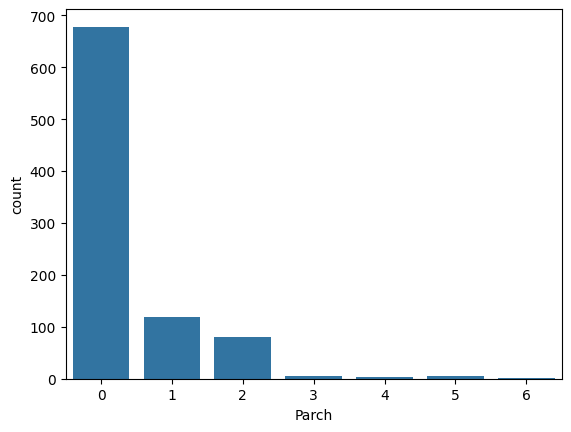

In [53]:
sns.countplot(data=train, x='Parch')

<Axes: xlabel='SibSp', ylabel='count'>

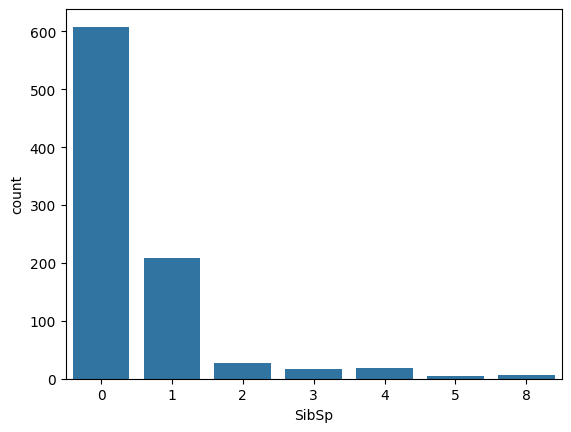

In [54]:
sns.countplot(data=train, x='SibSp')

4. 애매한 Categorical Feature 처리

In [55]:
train['Parch_yes'] = train['Parch']>0
train['SibSp_yes'] = train['SibSp']>0

test['Parch_yes'] = test['Parch']>0
test['SibSp_yes'] = test['SibSp']>0

5. Name의 Miss, Mr 과 같은 호 를 활용해 Categorical Column으로 변경

In [56]:
train['Name_second'] = train['Name'].apply(lambda x: x.split(', ')[1].split('. ')[0])
test['Name_second'] = test['Name'].apply(lambda x: x.split(', ')[1].split('. ')[0])

In [59]:
#df.replace 활용법 숙지
test['Name_second'] = test['Name_second'].replace('Dona','Don')

In [57]:
#객실번호
train['Cabin_alphabet'] = train['Cabin'].apply(lambda x: str(x)[0])
test['Cabin_alphabet'] = test['Cabin'].apply(lambda x: str(x)[0])

6. Categorical feature를 Label Encoder로 변경

In [58]:
categorical = ['Sex','Embarked','Cabin_alphabet','Name_second']

In [60]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])

train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

train['Cabin_alphabet'] = le.fit_transform(train['Cabin_alphabet'])
test['Cabin_alphabet'] = le.transform(test['Cabin_alphabet'])

train['Name_second'] = le.fit_transform(train['Name_second'])
test['Name_second'] = le.transform(test['Name_second'])

<Axes: >

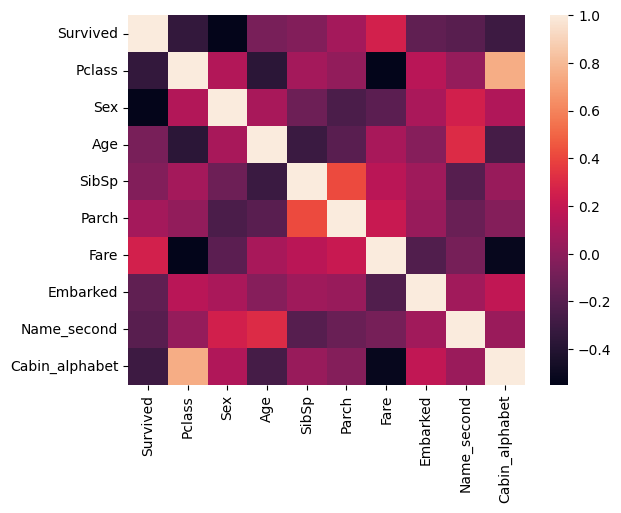

In [61]:
sns.heatmap(train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Name_second','Cabin_alphabet']].corr())

In [98]:
#crosstab 사용법 숙지
pd.crosstab(train['Sex'],train['Pclass'])

Pclass,1,2,3
Sex,,,
0,94,76,144
1,122,108,347


7. 연속형 변수 Age 범주형으로 변경

<Axes: xlabel='Age', ylabel='Count'>

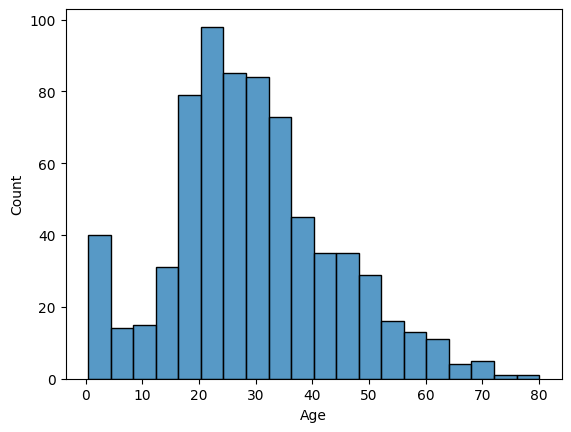

In [62]:
sns.histplot(data=train, x='Age')

In [63]:
train['Age'] = train['Age'].fillna(np.mean(train['Age']))
test['Age'] = test['Age'].fillna(np.mean(train['Age']))

In [64]:
bins = [0,9,19,29,39,49,59,float('inf')]
train['Age_bin'] = pd.cut(x=train["Age"], bins=bins)
test['Age_bin'] = pd.cut(x=test["Age"], bins=bins)

In [67]:
train['Age_bin'] = le.fit_transform(train['Age_bin'])
test['Age_bin'] = le.transform(test['Age_bin'])

8. 문자형 변수 제거

In [65]:
#use only numeric
train = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [66]:
test = test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [68]:
test['Fare'] = test['Fare'].fillna(np.mean(test['Fare']))

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Embarked        891 non-null    int64  
 8   Parch_yes       891 non-null    bool   
 9   SibSp_yes       891 non-null    bool   
 10  Name_second     891 non-null    int64  
 11  Cabin_alphabet  891 non-null    int64  
 12  Age_bin         891 non-null    int64  
dtypes: bool(2), float64(2), int64(9)
memory usage: 78.4 KB


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Sex             418 non-null    int64  
 2   Age             418 non-null    float64
 3   SibSp           418 non-null    int64  
 4   Parch           418 non-null    int64  
 5   Fare            418 non-null    float64
 6   Embarked        418 non-null    int64  
 7   Parch_yes       418 non-null    bool   
 8   SibSp_yes       418 non-null    bool   
 9   Name_second     418 non-null    int64  
 10  Cabin_alphabet  418 non-null    int64  
 11  Age_bin         418 non-null    int64  
dtypes: bool(2), float64(2), int64(8)
memory usage: 33.6 KB


## Modeling

In [71]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [72]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [73]:
test_pred = []
kfold = StratifiedKFold(n_splits=5,shuffle=True)
for k, (train_idx, valid_idx) in enumerate(kfold.split(X,y)):
    train_X = X.iloc[train_idx]
    valid_X = X.iloc[valid_idx]
    train_y = y[train_idx]
    valid_y = y[valid_idx]    

    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    valid_X = scaler.transform(valid_X)
    test_X = scaler.transform(test)

    stacking = StackingClassifier([
        ('rf', RandomForestClassifier(n_estimators=1000)),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ], LogisticRegression())
    stacking.fit(train_X,train_y)
    pred = stacking.predict(valid_X)
    print('valid'+str(k), accuracy_score(valid_y,pred))

    test_pred.append(stacking.predict_proba(test_X))


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [74]:
submission = pd.read_csv('dataset/submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [75]:
sum((np.array(test_pred)[:,:,1]>0.5).astype(int))

array([0, 0, 0, 4, 2, 0, 1, 0, 5, 0, 0, 0, 5, 0, 5, 5, 0, 1, 4, 4, 0, 2,
       5, 0, 5, 0, 5, 3, 4, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 4, 0, 4, 0, 5,
       5, 0, 1, 0, 5, 3, 1, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5,
       5, 0, 1, 5, 5, 0, 1, 3, 5, 2, 0, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 2,
       5, 5, 1, 0, 5, 0, 0, 0, 5, 0, 4, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 0, 0, 5, 1, 5, 5, 0, 5, 0, 0, 1, 0, 5, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 5, 0, 0, 0, 4, 0, 5, 0, 0, 3,
       0, 0, 5, 2, 5, 3, 5, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 0, 5,
       5, 0, 5, 5, 0, 3, 5, 0, 5, 0, 5, 0, 0, 0, 0, 0, 3, 0, 5, 0, 5, 1,
       0, 1, 5, 5, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 1, 0, 5, 0, 0, 0, 5, 0, 0, 2, 0, 1, 2, 5, 5, 5, 5,
       0, 0, 0, 2, 5, 0, 5, 1, 5, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5,
       1, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 5, 0, 0, 0, 0, 0, 5, 5, 1, 5, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 5, 0, 0, 0, 0,

In [76]:
submission['Survived'] = np.argmax(sum(np.array(test_pred)>0.5),axis=-1)
submission.to_csv('submission_1026.csv',index=False)

In [77]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
